In [1]:
#importing libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [3]:
print(tf.__version__) #checking tensorflow version

2.5.0


In [4]:
from tensorflow.keras.datasets import mnist #loading the MNIST dataset

In [5]:
(X_train, Y_train),(X_test,Y_test) = mnist.load_data() #Creating train and test sets

In [9]:
X_train.shape,Y_train.shape
numbers = np.arange(0,10,1)   #creating the list of digits from 0 to 9
Y_train[1922]                 #checking the output format

4

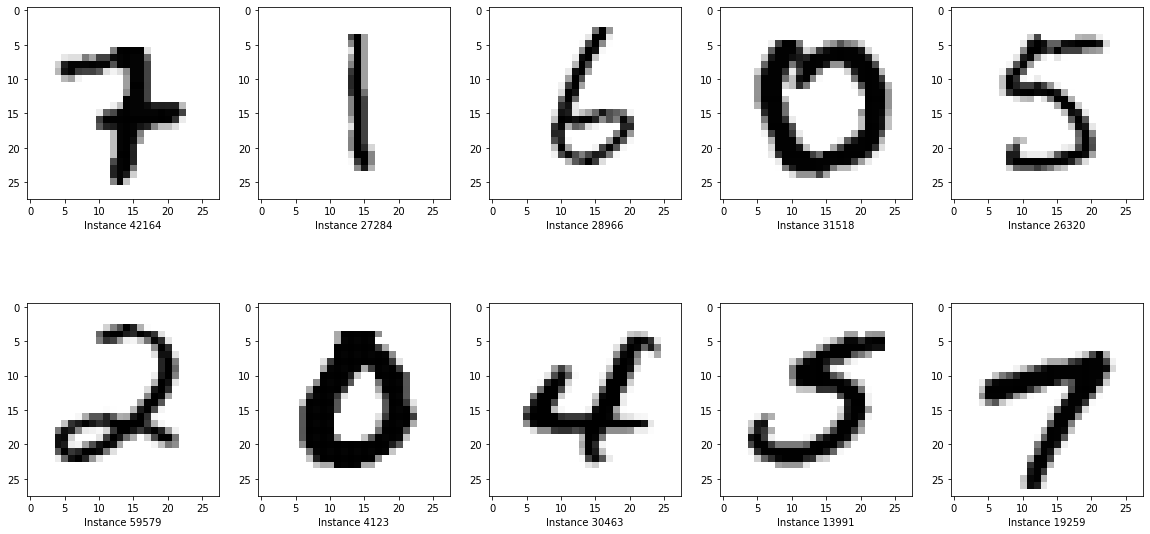

In [7]:
fig , axis = plt.subplots(nrows = 2, ncols=5,figsize = (20,10)) #visualising random digits
for i in range(2):
    for j in range(5):
        instance = np.random.randint(0,60000)                   #choosing random number
        axis[i,j].imshow(X_train[instance],cmap = 'binary')     
        axis[i,j].set_xlabel(f'Instance {instance}') 

In [3]:
from tensorflow.keras.utils import to_categorical   #importing function to convert a single digit to a list of all digits.

In [49]:
Y_train_encoded = to_categorical(Y_train)
Y_test_encoded = to_categorical(Y_test)

In [12]:
Y_train_encoded = Y_train_encoded.astype(int)
lst = list(Y_train_encoded[6892])
lst.index(max(lst))

3

In [14]:
X_train[0].shape   #checking shape of input digit

(28, 28)

In [15]:
from tensorflow.keras.models import Sequential #importing the model and layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [54]:
Model = Sequential([
    
        Flatten(input_shape=(28, 28)),
        Dense(100,activation = 'relu'),      #first layer to detect vertical edge
        Dense(100,activation = 'relu'),      #second for horizontal edge
        Dense(100,activation = 'relu'),      #third for c shaped curve
        Dense(100,activation = 'relu'),      #fourth for inverted c curve
        Dense(100,activation = 'relu'),      #last for slant edge
        Dense(10, activation = 'softmax')
    
            ])

Model.compile(optimizer='Adam',                      #choosing the appropriate optimizers and loss functions
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
Model.fit(X_train, 
          Y_train_encoded, 
          epochs=15,validation_data=(X_test, Y_test_encoded)
         )

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4859 - accuracy: 0.8831 - val_loss: 0.2029 - val_accuracy: 0.9413
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1834 - accuracy: 0.9472 - val_loss: 0.2130 - val_accuracy: 0.9419
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1474 - accuracy: 0.9572 - val_loss: 0.1526 - val_accuracy: 0.9588
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1207 - accuracy: 0.9658 - val_loss: 0.1406 - val_accuracy: 0.9604
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1054 - accuracy: 0.9700 - val_loss: 0.1246 - val_accuracy: 0.9654
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0950 - accuracy: 0.9736 - val_loss: 0.1217 - val_accuracy: 0.9691
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0860 - accuracy: 0.9769 - val_loss: 0.1355 - val_accuracy:

asd = list(zip(Model.history.history["loss"] , Model.history.history["accuracy"]))
results = dict(asd)

In [56]:
losses = Model.history.history["loss"]
accuracy = Model.history.history["accuracy"]
epochs = Model.history.epoch

In [57]:
for x in range(len(epochs)):
    epochs[x] = epochs[x] + 1

In [58]:
results = {'Epoch' : epochs,
           'Loss' : losses,
           'Accuracy' : accuracy}

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 'Loss': [0.4859073758125305,
  0.1833619773387909,
  0.14739158749580383,
  0.1207071915268898,
  0.10535822808742523,
  0.09497623890638351,
  0.08603478968143463,
  0.08232331275939941,
  0.07153182476758957,
  0.0678684189915657,
  0.06236831843852997,
  0.0569937564432621,
  0.051419686526060104,
  0.05158204212784767,
  0.05391301214694977],
 'Accuracy': [0.8830500245094299,
  0.9472333192825317,
  0.9572166800498962,
  0.9658166766166687,
  0.9700000286102295,
  0.9736499786376953,
  0.9769333600997925,
  0.977066695690155,
  0.98089998960495,
  0.9817000031471252,
  0.9832000136375427,
  0.9841833114624023,
  0.9865333437919617,
  0.9869333505630493,
  0.9860833287239075]}

In [59]:
results = pd.DataFrame(data = results,columns=['Loss','Accuracy'],index = epochs)
results.index.name = 'Epoch'

In [60]:
results

,Loss,Accuracy
Epoch,,
1,0.485907,0.883050
2,0.183362,0.947233
3,0.147392,0.957217
4,0.120707,0.965817
5,0.105358,0.970000
6,0.094976,0.973650
7,0.086035,0.976933
8,0.082323,0.977067
9,0.071532,0.980900


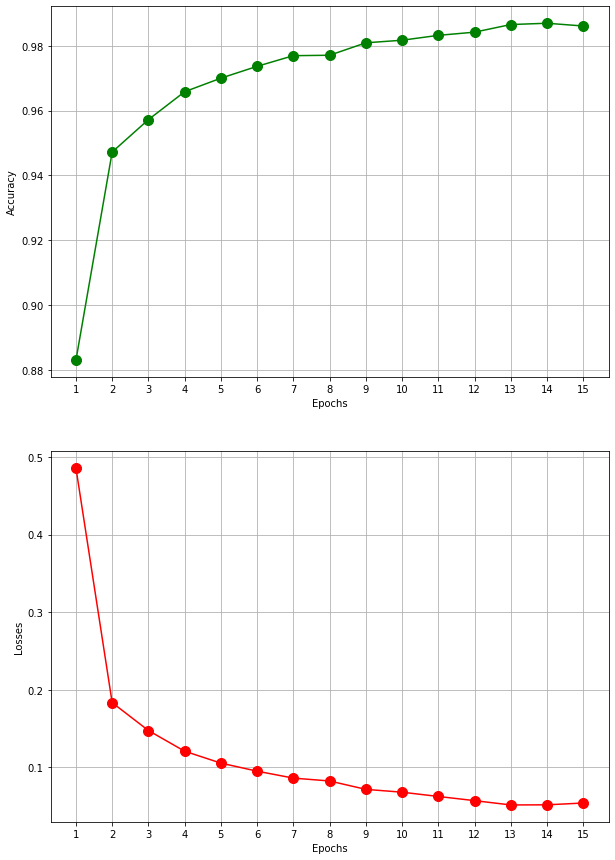

In [61]:
fig, axes = plt.subplots(2,1,figsize = (10,15))     #visualizing the losses, accuracy vs epochs
axes[0].plot(epochs,accuracy,color = 'g',marker = 'o',markersize = 10)
axes[0].set_xticks(epochs)
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].grid()


axes[1].plot(epochs,losses,color = 'r',marker = 'o',markersize = 10)
axes[1].set_xticks(epochs)
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Losses')
axes[1].grid()

plt.savefig('Result_wo_annotate1.png')

In [62]:
Model.save('Digit Recognizer1')   #saving the model for future use

INFO:tensorflow:Assets written to: Digit Recognizer1\assets


In [45]:
def predict_digit(digit):                                  #creating functions for predicting the digit
    pred = Model.predict(digit.reshape(-1,784))
    pred = pred.flatten()
    pred = list(pred)
    return pred.index(max(pred))


def process_image(image):         #function for image processing so that the image has only two pixel values: 0 and 255
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)                 
    for i in range(28):
        for j in range(28):
            if grayscale_image[i,j] > 200:
                grayscale_image[i,j] = 0 
            else :
                grayscale_image[i,j] = 255
    return grayscale_image

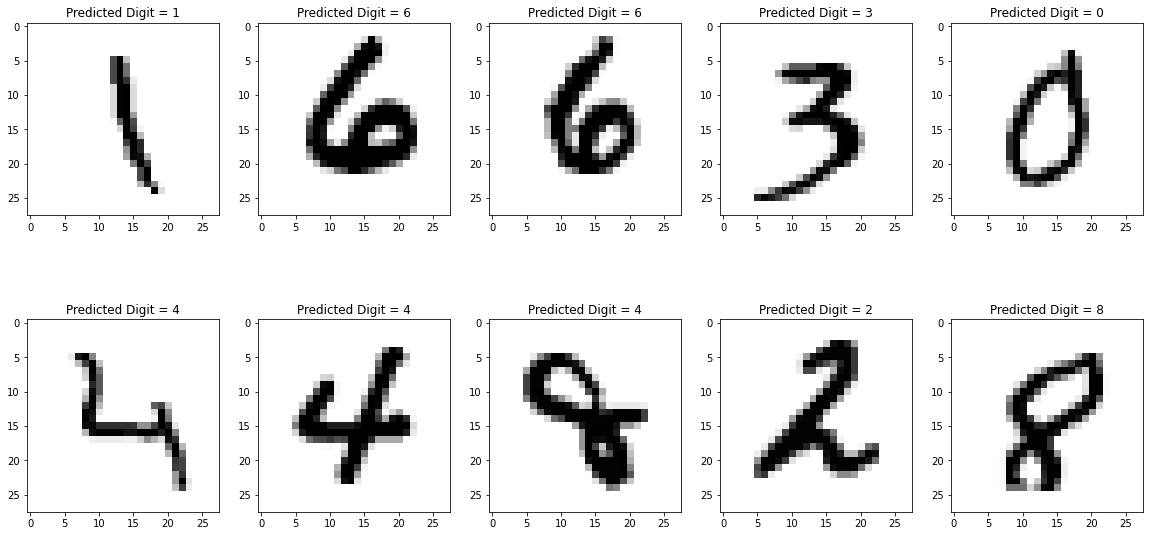

In [120]:
fig, axis = plt.subplots(2,5,figsize = (20,10))
for i in range(2):
    for j in range(5):
        image = X_test[np.random.randint(0,10000)]
        axis[i,j].imshow(image,cmap='binary')
        axis[i,j].set_title(f'Predicted Digit = {predict_digit(image)}')

In [9]:
Model = tf.keras.models.load_model('Digit Recognizer')  #loading the model

In [53]:
path = 'Test Images'                 #loading my hand written digits
image_list = []
for i in range(1,11):
    image = cv2.imread(f'Test Images/N ({i}).png')
    image_list.append(image)

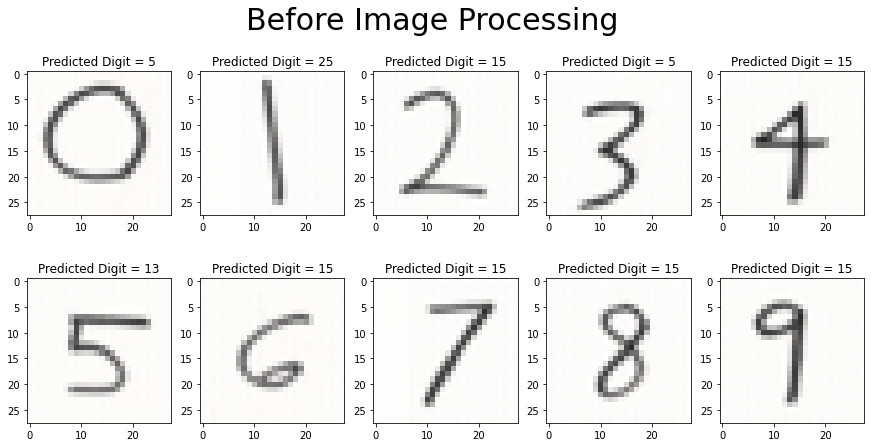

In [92]:
index = 0
fig, axes = plt.subplots(2,5,figsize = (15,7))
for i in range(2):
    for j in range(5):
        axes[i,j].imshow(image_list[index])
        axes[i,j].set_title(f'Predicted Digit = {predict_digit(image_list[index])}')
        fig.suptitle('Before Image Processing',size=30)
        index+=1
plt.savefig('Before Image Processing.png')

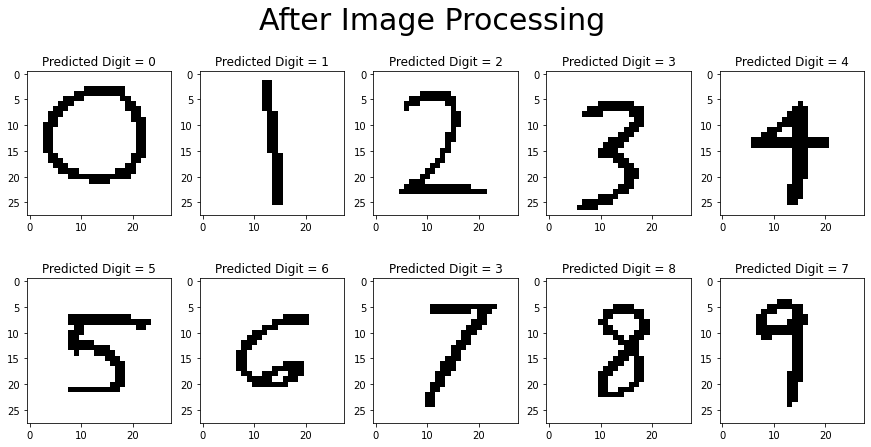

In [93]:
index = 0
fig, axes = plt.subplots(2,5,figsize = (15,7))
for i in range(2):
    for j in range(5):
        axes[i,j].imshow(process_image(image_list[index]),cmap='binary')
        axes[i,j].set_title(f'Predicted Digit = {predict_digit(process_image(image_list[index]))}')
        fig.suptitle('After Image Processing',size=30)
        index+=1
plt.savefig('After Image Processing.png')

In [102]:
predictions = []
numbers = list(np.arange(0,10,1))
for i in range(10):
    predicted_number = predict_digit(process_image(image_list[i]))
    predictions.append(predicted_number)
    
correct_predictions=[]
wrong_predictions = []
for i in range(10):
    if predictions[i] == numbers[i]:
        correct_predictions.append(predictions[i])
    else :
        wrong_predictions.append(predictions[i])
        
accuracy = len(correct_predictions) / len(numbers)
print(f'Accuracy = {accuracy*100}%')